## Text Analysis (Enron energy bid)

In [16]:
enron <- read.csv("csv/energy_bid.csv", stringsAsFactors = F)
head(enron)

# for better readable string formatting
enron$email[4]
strwrap(enron$email[4])

# looking at fraction of samples with `responsive=1`
table(enron$responsive)

email,responsive


[1] "^ ----- Forwarded by Steven J Kean/NA/Enron on 03/02/2001 12:27 PM ----- Suzanne_Nimocks@mckinsey.com Sent by: Carol_Benter@mckinsey.com 03/02/2001 12:04 PM \t   To: skean@enron.com  cc:   Subject: California Power Markets Sorry that we haven't talked in some time.  I thought that you would want to take a look at some analysis we have recently completed with regard to the California Power Crisis.  You may find some of the analysis to be helpful.  Let me know if you have any questions. (See attached file: 10209 zxd414.ppt) +-------------------------------------------------------------+ ***********"

[1] "^ ----- Forwarded by Steven J Kean/NA/Enron on 03/02/2001 12:27 PM"    
 [2] "----- Suzanne_Nimocks@mckinsey.com Sent by: Carol_Benter@mckinsey.com" 
 [3] "03/02/2001 12:04 PM To: skean@enron.com cc: Subject: California Power" 
 [4] "Markets Sorry that we haven't talked in some time.  I thought that you"
 [5] "would want to take a look at some analysis we have recently completed" 
 [6] "with regard to the California Power Crisis.  You may find some of the" 
 [7] "analysis to be helpful.  Let me know if you have any questions. (See"  
 [8] "attached file: 10209 zxd414.ppt)"                                      
 [9] "+-------------------------------------------------------------+"       
[10] "***********"


  0   1 
714 137 

### Preprocessing

In [14]:
library(tm)
corpus <- Corpus(VectorSource(enron$email))

# lowercasing everything
corpus <- tm_map(corpus, tolower)

# remove common stopwords
corpus <- tm_map(corpus, removeWords, stopwords("english"))

# remove punctuation
corpus <- tm_map(corpus, removePunctuation)

# remove numbers
corpus <- tm_map(corpus, removeNumbers)

# stemming document
corpus <- tm_map(corpus, stemDocument)

Creating document-term matrix using corpus dictionary.

In [15]:
freq <- DocumentTermMatrix(corpus)
freq # note that again, sparsity is extremely high

<<DocumentTermMatrix (documents: 851, terms: 13634)>>
Non-/sparse entries: 73034/11529500
Sparsity           : 99%
Maximal term length: 112
Weighting          : term frequency (tf)

Removing extremely sparse terms that do not occur in 97% of all documents

In [18]:
freq <- removeSparseTerms(freq, 0.97)

<<DocumentTermMatrix (documents: 851, terms: 613)>>
Non-/sparse entries: 38012/483651
Sparsity           : 93%
Maximal term length: 19
Weighting          : term frequency (tf)

Building the dataframe for building models!

In [35]:
energysparse <- as.data.frame(as.matrix(freq))
energysparse$responsive <- enron$responsive
colnames(energysparse) <- make.names(colnames(energysparse))
# str(energysparse)

# splitting train/test set
set.seed(1978)
library(caTools)
spl <- sample.split(energysparse$responsive, SplitRatio = 0.7)
train <- subset(energysparse, spl == T)
test <- subset(energysparse, spl == F)

### Building CART

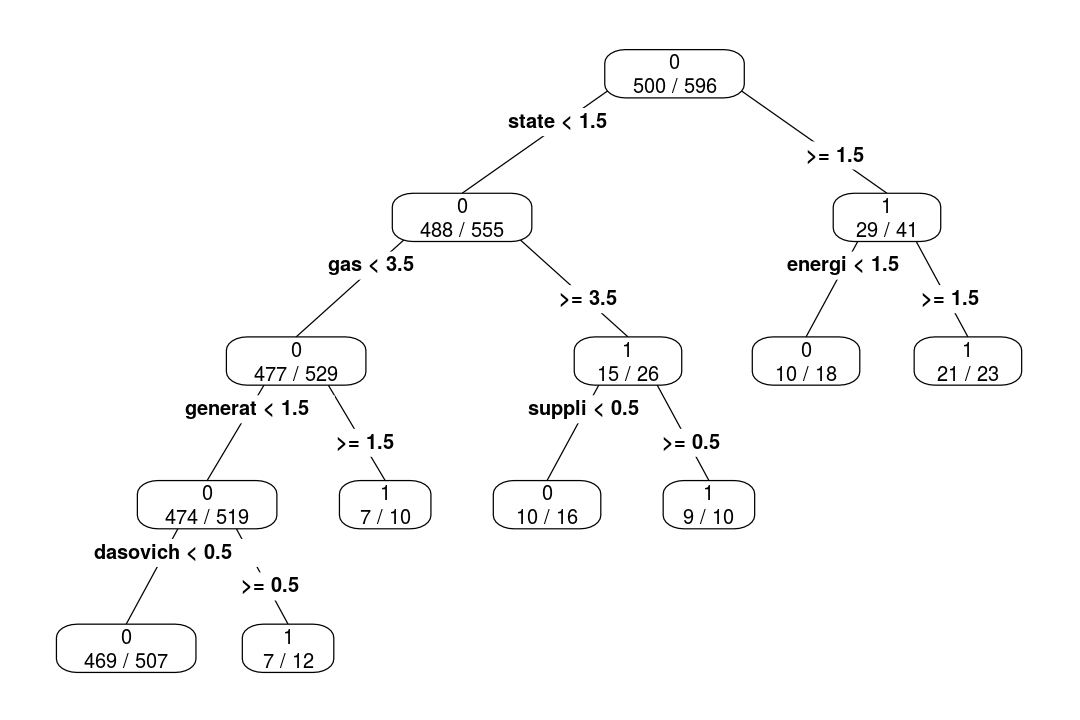

In [40]:
library(rpart)
library(rpart.plot)
set.seed(1)

# getting the model
model1 <- rpart(as.factor(responsive)~., train)
options(repr.plot.width=9, repr.plot.height=6) # resize IRkernel plot size
prp(model1, type=4, extra=2)

Predicting test set responses

In [42]:
predict1 <- predict(model1, test, type="class")
table(predict1, test$responsive)

# accuracy
(199+15)/(199+15+15+26) # 83.9%

        
predict1   0   1
       0 199  26
       1  15  15

[1] 0.8392157

### Building random forests

In [44]:
library(randomForest)
set.seed(1979)

model2 <- randomForest(as.factor(responsive)~., train)

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.


In [72]:
predict2 <- predict(model2, test, type="class")

# accuracy
table(predict2, test$responsive)
(204+19)/(204+19+10+22) # 87.4%

# varUsed() lets us find out how many times that variable came up
order2 <- sort(varUsed(model2), index.return = T)
order2


# get names of those variables that have the highest use count
# ?names
names(test[,tail(order2$ix)])

        
predict2   0   1
       0 204  22
       1  10  19

[1] 0.8745098

$x
  [1]   4   5   6   6   6   7   7   8   8   8   8   9   9   9  10  10  10  10
 [19]  10  10  10  11  11  11  11  11  11  11  11  11  11  11  11  12  12  12
 [37]  12  12  12  12  12  12  12  13  13  13  13  13  13  13  13  13  13  13
 [55]  14  14  14  14  14  14  15  15  15  15  15  15  15  15  15  15  15  15
 [73]  15  15  16  16  16  16  16  16  16  16  16  16  17  17  17  17  17  17
 [91]  18  18  18  18  18  18  18  18  18  18  19  19  19  19  19  19  19  19
[109]  19  19  20  20  20  20  20  20  20  20  20  20  20  20  21  21  21  21
[127]  21  21  21  21  22  22  22  22  22  22  23  23  23  23  23  23  24  24
[145]  24  24  24  24  24  24  24  24  24  24  24  24  24  24  24  25  25  25
[163]  25  25  25  25  25  25  25  25  26  26  26  26  26  26  26  26  26  26
[181]  26  27  27  27  27  27  27  27  27  27  27  27  27  27  27  27  27  28
[199]  28  28  28  28  28  28  28  28  28  28  29  29  29  29  29  29  30  30
[217]  30  30  30  30  30  30  30  30  30  30  31  31  31  31  31  31  31  32
[235]  32  32  32  32  32  32  32  32  32  32  32  32  32  32  32  33  34  34
[253]  34  34  34  34  34  34  34  34  34  35  35  35  35  35  35  35  35  35
[271]  35  36  36  36  36  36  36  36  36  36  37  37  37  37  37  37  38  38
[289]  38  38  38  38  39  39  39  39  39  39  39  40  40  40  40  41  41  41
[307]  42  42  42  42  42  42  42  42  43  43  43  44  44  44  44  44  44  44
[325]  45  45  45  45  45  46  46  46  46  46  46  47  47  47  47  47  47  48
[343]  48  49  49  49  49  50  50  50  50  50  51  51  51  51  51  51  51  51
[361]  51  52  52  52  52  52  53  53  53  53  53  54  54  54  54  54  55  55
[379]  55  55  55  55  56  56  57  57  57  57  57  58  58  58  58  59  59  59
[397]  59  59  59  60  60  61  61  62  62  63  63  64  65  65  66  66  66  66
[415]  66  67  67  67  68  68  68  69  69  69  70  70  71  71  72  72  73  73
[433]  74  74  74  75  75  76  76  76  77  77  77  77  78  78  80  80  80  80
[451]  82  82  82  83  83  84  84  85  85  86  86  86  86  87  87  89  89  89
[469]  89  90  90  90  90  92  92  93  93  93  94  94  94  95  95  95  95  96
[487]  96  96  97  97  99  99 100 100 101 102 102 102 103 104 104 106 107 108
[505] 109 110 111 111 111 112 112 112 113 113 113 114 114 114 115 115 116 117
[523] 117 118 118 119 120 121 121 122 123 124 125 125 129 129 129 130 131 132
[541] 133 136 136 138 138 141 145 146 146 149 150 150 151 152 154 154 154 155
[559] 156 159 159 159 161 161 162 163 164 165 166 168 169 171 176 179 179 179
[577] 180 181 186 186 188 190 194 197 198 201 202 202 204 206 214 215 217 218
[595] 222 228 234 237 237 237 257 287 289 345 355 360 363 369 380 422 438 515
[613] 519

$ix
  [1]  23 366  40 280 581   7 401 411 419 537 539  79 226 597  32  81 253 268
 [19] 456 473 594  12  61 177 232 276 311 354 453 460 474 583 600  31 104 114
 [37] 178 239 306 522 558 559 603  38  60 195 230 281 397 402 410 515 532 573
 [55] 259 319 336 352 409 534  39  91 367 421 472 477 497 514 536 577 587 588
 [73] 595 601   9  87 119 233 257 260 265 505 564 567  54  63 200 503 560 582
 [91]  21 110 412 442 443 465 490 544 557 589  69  97 164 345 380 447 504 528
[109] 561 572   8  94 126 218 278 310 347 360 387 404 478 508 254 332 351 457
[127] 501 529 551 571 169 398 516 527 570 591  56  68 108 308 556 578  78 112
[145] 251 255 304 343 385 386 395 436 461 471 480 540 576 585 606 107 111 184
[163] 220 248 312 376 418 435 455 512  34 206 256 307 370 372 483 486 519 554
[181] 586  10  11  80 128 152 170 201 214 249 263 388 417 425 463 563 574  41
[199]  64 194 225 247 261 286 325 335 444 496 190 302 326 330 468 575  25  52
[217] 229 270 291 349 364 405 413 432 446 464 172 199 309 357 375 590 607   4
[235]  19  20 167 221 234 238 283 303 328 348 451 452 517 550 605  85 236 244
[253] 313 346 355 440 475 518 546 549 596  27  59  95 117 145 153 216 543 553
[271] 562  82  83 105 138 323 331 415 498 552   1  22  28 246 500 526  62 217
[289] 377 525 555 592 123 245 275 290 340 530 548 271 320 423 430 143 208 362
[307

[1] "thank"   "jeff"    "attach"  "pleas"   "forward" "subject"

In [73]:
# area under curve for random forests is pretty good

# TODO: read notes and implement AUC metric testing

### Building Naive Bayes

In [69]:
library(e1071)
model3 <- naiveBayes(as.factor(responsive)~., train)
summary(model3)

# model3$tables

predict3 <- predict(model3, test, type="class")
predict3
table(predict3, test$responsive)

        Length Class  Mode     
apriori   2    table  numeric  
tables  613    -none- list     
levels    2    -none- character
call      4    -none- call     

[1] 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0
 [38] 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 0 1 0 1 0 0 1 0
 [75] 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0
[112] 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
[149] 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[186] 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1
[223] 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1
Levels: 0 1

        
predict3   0   1
       0 185  16
       1  29  25